
# <center> Statistical Analysis of the Fandango site reviews

### Aim: 
To analyse the validity of the reviews that come from the review site of the Fandango site analysis. Are they over rated in their analysis?    

Has been any change in Fandango's rating system after Hickey's analysis??

### Data availability:    
https://github.com/fivethirtyeight/data/tree/master/fandango
https://github.com/mircealex/Movie_ratings_2016_17


## Introduction

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [5]:
score_comparison = pd.read_csv('/content/drive/MyDrive/Fandango/fandango_score_comparison.csv')
movie_ratings = pd.read_csv('/content/drive/MyDrive/Fandango/movie_ratings_16_17.csv')

In [6]:
score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [7]:
score_comparison.shape

(146, 22)

In [9]:
score_comparison.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,3.259589,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,0.755356,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,1.200000,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,2.850000,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,3.425000,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,3.750000,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [10]:
movie_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [11]:
movie_ratings.shape

(214, 15)

In [12]:
movie_ratings.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [14]:
score_comparison.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [24]:
sc = score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
sc.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [17]:
mr = movie_ratings[['movie', 'year', 'fandango']]
mr.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


 The selection of movies from the sc dataframe ('fandango_score_comparison.csv') is not random when selections were made based on other reveiwers from part of 2015.         

 The selection of movies from the mr dataframe ('movie_ratings_16_17.csv') doesnt really represent a true random selection of movies for it is stated that popular movies were selected for. 

## Examining and plotting the KDE distributions for a comparison of 2015 and 2016

In [21]:
mr_2016 = mr[mr['year'] == 2016]
mr_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [25]:
sc_2015 = sc
sc_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


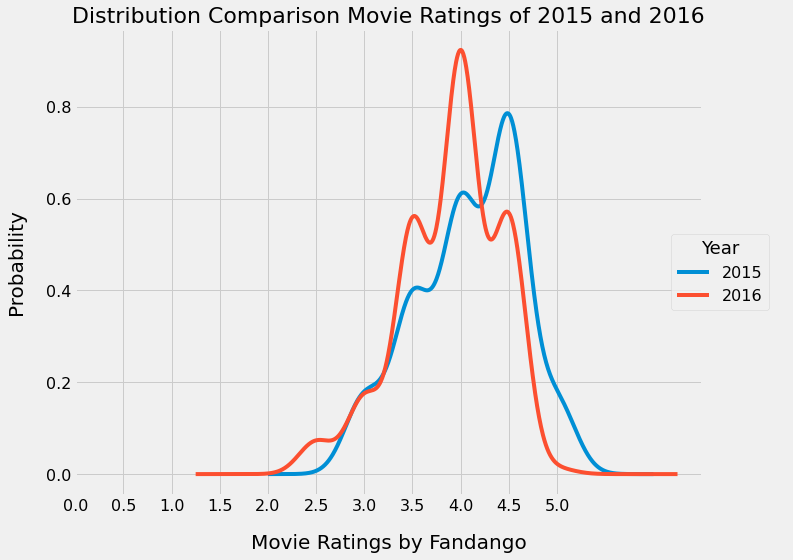

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
values = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
sc_2015['Fandango_Stars'].plot.kde()
mr_2016['fandango'].plot.kde()
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Year',prop={'size':18})
plt.xticks(values)
ax.tick_params(labelsize=16)
plt.title('Distribution Comparison Movie Ratings of 2015 and 2016', fontsize=22)
plt.xlabel('Movie Ratings by Fandango', fontsize=20, labelpad = 20) 
plt.ylabel('Probability', fontsize=20, labelpad = 20)
plt.show()

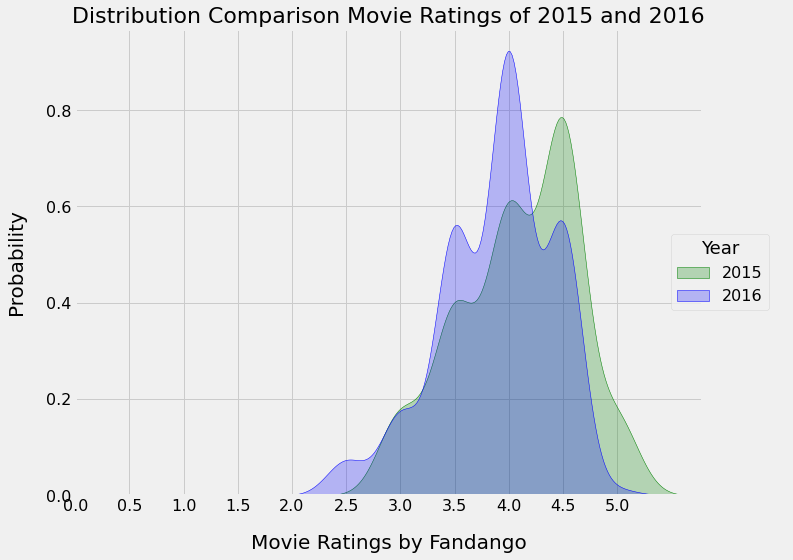

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
values = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
x=sc_2015['Fandango_Stars']
y=mr_2016['fandango']
sns.kdeplot(x, color='green', shade=True, legend=True)
sns.kdeplot(y, color='blue', shade=True, legend=True)
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Year',prop={'size':18})
plt.xticks(values)
ax.tick_params(labelsize=16)
plt.title('Distribution Comparison Movie Ratings of 2015 and 2016', fontsize=22)
plt.xlabel('Movie Ratings by Fandango', fontsize=20, labelpad = 20) 
plt.ylabel('Probability', fontsize=20, labelpad = 20)
plt.show()


- What is the shape of each distribution and how to theirs shapes compare?  
  Balanced distribution is shown in orange and a skewed to the right is shown in blue.

- If their shapes are similar, is there anything that clearly differentiates them?               
  There appears to be more higher ratings around 4.5 given for the year 2015, than compared to the highest ratings being around 4.0 for 2016.

- Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?     
  Yes. There appears to be higher ratings being given more often in 2015 than compared to that of 2016.        

- Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?            
  Yes. In 2016, movies were rated lower but gave a better balance for the distribution of the ratings.




## Comparing summary statistics


In [39]:
mean_2015 = round(sc_2015['Fandango_Stars'].mean(), 2)
median_2015 = sc_2015['Fandango_Stars'].median()
mode_2015 = sc_2015['Fandango_Stars'].mode().iloc[0]
print('Mean of 2015 data =', mean_2015, '\n')
print('Median of 2015 data =', median_2015, '\n')
print('Primary Mode of 2015 data =', mode_2015, '\n')

mean_2016 = round(mr_2016['fandango'].mean(), 2)
median_2016 = mr_2016['fandango'].median()
mode_2016 = mr_2016['fandango'].mode().iloc[0]
print('Mean of 2016 data =', mean_2016, '\n')
print('Median of 2016 data =', median_2016, '\n')
print('Primary Mode of 2016 data =', mode_2016, '\n')

Mean of 2015 data = 4.09 

Median of 2015 data = 4.0 

Primary Mode of 2015 data = 4.5 

Mean of 2016 data = 3.89 

Median of 2016 data = 4.0 

Primary Mode of 2016 data = 4.0 



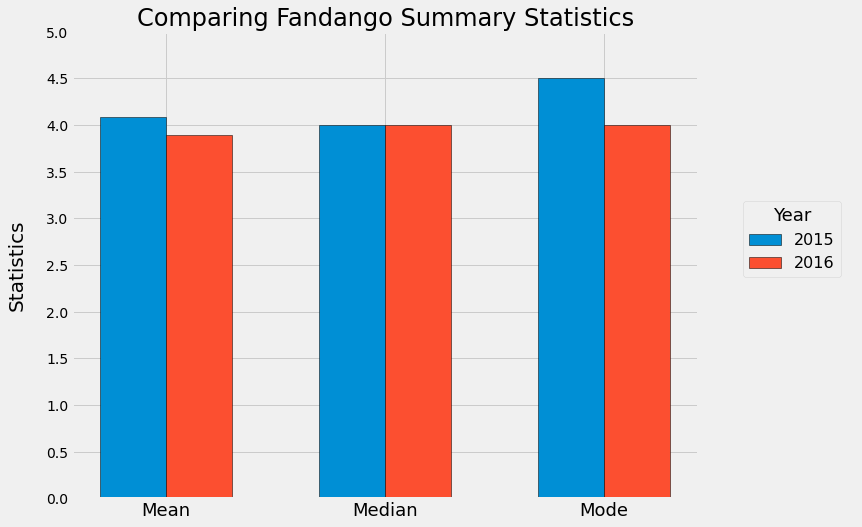

In [40]:
labels = ['Mean', 'Median', 'Mode']
r_15_stat = [4.09, 4.0, 4.5]
r_16_stat = [3.89, 4.0, 4.0]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, r_15_stat, width, label='2015', edgecolor='black')
rects2 = ax.bar(x + width/2, r_16_stat, width, label='2016', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Statistics', fontsize=20, labelpad=20)
ax.set_title('Comparing Fandango Summary Statistics', fontsize=24)
ax.set_xticks(x)
plt.yticks(np.linspace(0, 5, 11))
ax.set_xticklabels(labels, fontsize=18)
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1.1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Year',prop={'size':18})

plt.show()

## Summary         
There appears to be some differneces in the Fandangos reviews when comparing the 2015 data to the 2016, as represented by the graphical displays above. 
The magnitudinal difference in means is fairly low and there is no change in the median. The mode representing the number most repeated is not a dramatic difference to give concern about an error in the data. 
The review distributions do demonstrate a tendancy for lower reviews in 2016 in comparison to 2015 and a better more balanced distribution. This may be more preferrable by consideration of the sampling of the entire population of movies should be taken into acount here. 

Thanks to all for reading!           
Have a great week!            
Best regards,          
Bill        
